#Project 2

**Name:** Thomas Greenacre

**Date:** 7/6/2022

In [866]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [867]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1

First Choice: Dataset 1

In [868]:
# import dataset 1 and assign to dataframe, show first 5 rows
filename = '/content/drive/MyDrive/Coding Dojo/Week 7/Project 2 - Part 1/car_price_prediction[1].csv'
df_1 = pd.read_csv(filename)
df_1.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [869]:
#determine # of rows and features (columns)
np.shape(df_1)

(19237, 18)

In [870]:
# import dataset 2 and assign to dataframe, show first 5 rows
filename = '/content/drive/MyDrive/Coding Dojo/Week 7/Project 2 - Part 1/VehicleInsuranceData[1].csv'
df_2 = pd.read_csv(filename)
df_2.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [871]:
#inspect features, data tpes, null counts, etc.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8630 non-null   int64  
 1   clv                            8630 non-null   float64
 2   Response                       8630 non-null   object 
 3   Coverage                       8630 non-null   object 
 4   Education                      8630 non-null   object 
 5   EmploymentStatus               8630 non-null   object 
 6   Gender                         8630 non-null   object 
 7   Income                         8630 non-null   int64  
 8   Location.Code                  8630 non-null   object 
 9   Marital.Status                 8630 non-null   object 
 10  Monthly.Premium.Auto           8630 non-null   int64  
 11  Months.Since.Last.Claim        8630 non-null   int64  
 12  Months.Since.Policy.Inception  8630 non-null   i

In [872]:
#determine # of rows and features (columns)
np.shape(df_2)

(8630, 22)

**First Choice: Dataset 1**

1) Source of data: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge 

2) Brief description of data: this dataset has information (data) for various car makes & models. Features included in the data set are Manufacturer, Model, Category, Fuel Type, color, etc.

3) What is the target? Price (car price)

4) Is this a classification or regression problem?: Regression

5) How many features?: 18

6) How many rows of data?: 19,237

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
*   determining which features to keep/drop based on if they factor into the target
*   cleaning data, removing dups, imputing for missing values, missing data, etc.



---



**Second choice: dataset 2**

1) Source of data: https://www.kaggle.com/datasets/junglisher/vehicle-insurance-data

2) Brief description of data: this dataset has information for various individual insurance policies. Features included in the data set are Education, Marital Status, Income, Gender, etc. 

3) What is the target?: Monthly.Premium.Auto

4) Is this a classification or regression problem?: Regression

5) How many features?: 22

6) How many rows of data?: 8630

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
*   determining which features to keep/drop based on if they factor into the target
*   cleaning data, removing dups, imputing for missing values, missing data, etc.

## Part 2

In [873]:
#make a copy of the original dataframe
df = df_1.copy()
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


###delete unnecessary columns

In [874]:
#view all features (columns) to determine which can be deleted
#only delete columns that dont significantly impact the target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [875]:
#delete unneccesary featues
df = df.drop(columns = ['ID', 'Levy'])
#veryify features were dropped successfuly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

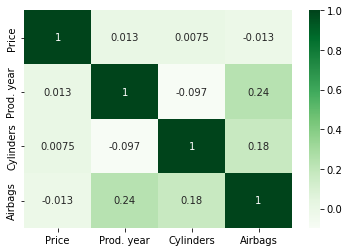

In [876]:
#create correlation heatmap to see if other features that can be dropped
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);
#takeaway: can remove Airbags, Cylinders, and Prod year

In [877]:
#delete unneccesary featues
df = df.drop(columns = ['Airbags', 'Cylinders', 'Prod. year'])
#veryify features were dropped successfuly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Manufacturer      19237 non-null  object
 2   Model             19237 non-null  object
 3   Category          19237 non-null  object
 4   Leather interior  19237 non-null  object
 5   Fuel type         19237 non-null  object
 6   Engine volume     19237 non-null  object
 7   Mileage           19237 non-null  object
 8   Gear box type     19237 non-null  object
 9   Drive wheels      19237 non-null  object
 10  Doors             19237 non-null  object
 11  Wheel             19237 non-null  object
 12  Color             19237 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.9+ MB


###delete duplicate rows

In [878]:
#dertimine # of rows pre dropping duplicate rows
df.shape

(19237, 13)

In [879]:
#determine # of duplicate rows
df.duplicated().sum()

3544

In [880]:
#drop duplicated rows
df = df.drop_duplicates()

#determing # of rows post droping duplicate rows
df.shape

(15693, 13)

###identify and address missing values

In [881]:
#count total missing values
df.isna().sum().sum()

0

###identify and correct inconsistencies in data for categorical values 

In [882]:
#set diplay rows to 999 so we can see all feature unique values
pd.set_option("display.max_rows", 999)

In [883]:
#view the Manufacturer field to see if any data cleanup is needed
df['Manufacturer'].value_counts(dropna=False).sort_index()

ACURA              15
ALFA ROMEO          4
ASTON MARTIN        1
AUDI              194
BENTLEY             2
BMW               920
BUICK              16
CADILLAC           14
CHEVROLET         967
CHRYSLER           26
CITROEN             9
DAEWOO             61
DAIHATSU           13
DODGE              89
FERRARI             2
FIAT               76
FORD              954
GAZ                12
GMC                13
GREATWALL           1
HAVAL               1
HONDA             872
HUMMER              5
HYUNDAI          3048
INFINITI           26
ISUZU               4
JAGUAR             42
JEEP              138
KIA               409
LAMBORGHINI         1
LANCIA              1
LAND ROVER         48
LEXUS             419
LINCOLN            15
MASERATI            4
MAZDA             141
MERCEDES-BENZ    1449
MERCURY             4
MINI               47
MITSUBISHI        288
MOSKVICH            4
NISSAN            594
OPEL              396
PEUGEOT            17
PONTIAC             1
PORSCHE   

In [884]:
#view the model field to see if any data cleanup is needed
df['Model'].value_counts(dropna=False).sort_index()

09-Mar     2
100        2
100 NX     1
1000       7
1111       1
          ..
kona       1
macan      2
macan S    1
tC         3
xD         3
Name: Model, Length: 1590, dtype: int64

In [885]:
#drop "Model" feature because too many unqiue fields + cleanup work needed
df = df.drop(columns = ['Model'])
#view dataframe to ensure Model has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15693 entries, 0 to 19236
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             15693 non-null  int64 
 1   Manufacturer      15693 non-null  object
 2   Category          15693 non-null  object
 3   Leather interior  15693 non-null  object
 4   Fuel type         15693 non-null  object
 5   Engine volume     15693 non-null  object
 6   Mileage           15693 non-null  object
 7   Gear box type     15693 non-null  object
 8   Drive wheels      15693 non-null  object
 9   Doors             15693 non-null  object
 10  Wheel             15693 non-null  object
 11  Color             15693 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.6+ MB


In [886]:
#view the Category field to see if any data cleanup is needed
df['Category'].value_counts(dropna=False).sort_index()

Cabriolet        35
Coupe           476
Goods wagon     229
Hatchback      2537
Jeep           4216
Limousine        11
Microbus        295
Minivan         534
Pickup           51
Sedan          6998
Universal       311
Name: Category, dtype: int64

In [887]:
#view the Leather interior field to see if any data cleanup is needed
df['Leather interior'].value_counts(dropna=False).sort_index()

No      5151
Yes    10542
Name: Leather interior, dtype: int64

In [888]:
#view the Fuel type field to see if any data cleanup is needed
df['Fuel type'].value_counts(dropna=False).sort_index()

CNG                468
Diesel            3205
Hybrid            2416
Hydrogen             1
LPG                713
Petrol            8805
Plug-in Hybrid      85
Name: Fuel type, dtype: int64

In [889]:
#view the Engine volume field to see if any data cleanup is needed
df['Engine volume'].value_counts(dropna=False).sort_index()

0               9
0.1             4
0.2             8
0.2 Turbo       1
0.3             2
0.3 Turbo       1
0.4             5
0.4 Turbo       1
0.5             1
0.6             4
0.6 Turbo       3
0.7            19
0.7 Turbo       6
0.8             7
0.8 Turbo       1
0.9             2
1             115
1.0 Turbo       8
1.1             8
1.1 Turbo       1
1.2           101
1.2 Turbo       4
1.3           455
1.3 Turbo      18
1.4           313
1.4 Turbo     154
1.5          1232
1.5 Turbo      65
1.6          1221
1.6 Turbo     116
1.7           150
1.7 Turbo      38
1.8          1533
1.8 Turbo     175
1.9            39
1.9 Turbo      31
2            3312
2.0 Turbo     402
2.1             7
2.1 Turbo       3
2.2           215
2.2 Turbo     213
2.3           111
2.3 Turbo      16
2.4           884
2.4 Turbo      49
2.5          1649
2.5 Turbo      91
2.6            18
2.7           103
2.7 Turbo      49
2.8            58
2.8 Turbo      12
2.9             9
2.9 Turbo      12
20        

In [890]:
#view the Mileage field to see if any data cleanup is needed
df['Mileage'].value_counts(dropna=False).sort_index()

0 km            598
1000 km         100
10000 km         33
100000 km       104
1000000 km        1
               ... 
99949 km          1
99971 km          1
99999 km          3
999999 km         3
999999999 km      5
Name: Mileage, Length: 7687, dtype: int64

In [891]:
#view the Gear box type field to see if any data cleanup is needed
df['Gear box type'].value_counts(dropna=False).sort_index()

Automatic    10063
Manual        1838
Tiptronic     3060
Variator       732
Name: Gear box type, dtype: int64

In [892]:
#view the Drive wheels field to see if any data cleanup is needed
df['Drive wheels'].value_counts(dropna=False).sort_index()

4x4       2757
Front    10968
Rear      1968
Name: Drive wheels, dtype: int64

In [893]:
#view the Doors field to see if any data cleanup is needed
df['Doors'].value_counts(dropna=False).sort_index()

02-Mar      746
04-May    14823
>5          124
Name: Doors, dtype: int64

In [894]:
#view the Wheel field to see if any data cleanup is needed
df['Wheel'].value_counts(dropna=False).sort_index()

Left wheel          14271
Right-hand drive     1422
Name: Wheel, dtype: int64

In [895]:
#view the Color field to see if any data cleanup is needed
df['Color'].value_counts(dropna=False).sort_index()

Beige             134
Black            3824
Blue             1247
Brown             172
Carnelian red     177
Golden            142
Green             287
Grey             1916
Orange            204
Pink               25
Purple             38
Red               567
Silver           3139
Sky blue          122
White            3605
Yellow             94
Name: Color, dtype: int64

###produce univariate visuals for the target and key features

In [896]:
df_2 = df.sample(7000).copy()

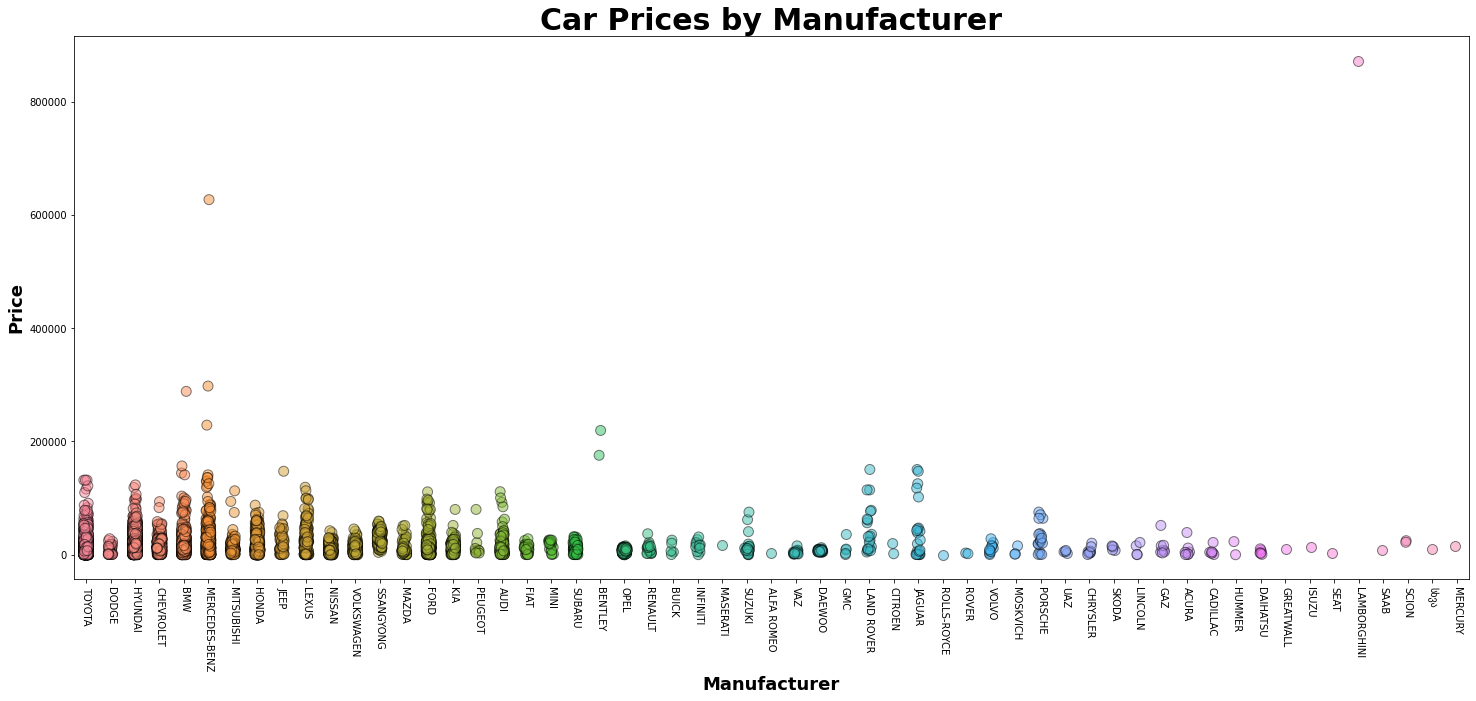

In [897]:
from pandas.io.formats import style
plt.figure(figsize=(25, 10))
sns.stripplot(x=df_2['Manufacturer'],y=df_2['Price'], edgecolor="black",alpha=.5, s=10,linewidth=1.0)
plt.xticks(rotation=-90)
plt.title('Car Prices by Manufacturer', fontsize=30, fontweight='bold')
plt.xlabel('Manufacturer', fontsize=18, fontweight='bold')
plt.ylabel('Price', fontsize=18, fontweight='bold')
plt.show();

In [898]:
#identify the outlier value
df['Price'].max()

26307500

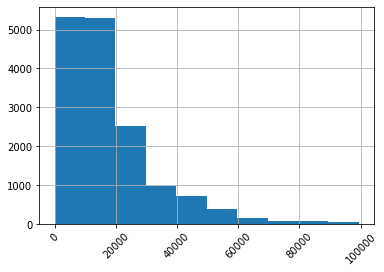

In [899]:
#remove cars prices over 100,000 from Price feature
df = df[df.Price < 100000]

#create hsitogram to undstand distribution of Age field
df['Price'].hist(bins = 10)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


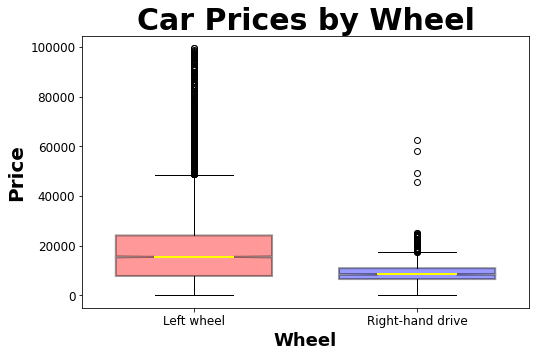

In [900]:
#create a box plot for the Wheel feature and both unique values
Left_Wheel = df.loc[df['Wheel']=='Left wheel','Price']
Right_Hand_Drive = df.loc[df['Wheel']=='Right-hand drive','Price']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Left_Wheel,Right_Hand_Drive],
           notch = True,
           labels=['Left wheel', 'Right-hand drive'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.title('Car Prices by Wheel', fontsize=30, fontweight='bold')
plt.xlabel('Wheel', fontsize = 18, fontweight='bold');
plt.ylabel('Price', fontsize = 20, fontweight='bold');
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show();

###identified outliers

*   Price: anything over 39,000



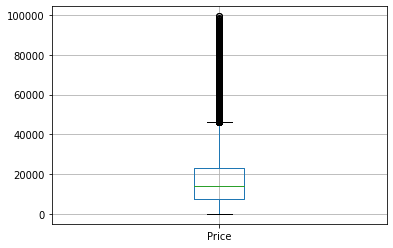

In [901]:
#remove cars prices over 100,000 from Price feature
df = df[df.Price != 26307500]

df.boxplot(column = 'Price');
plt.title('');
plt.suptitle('');

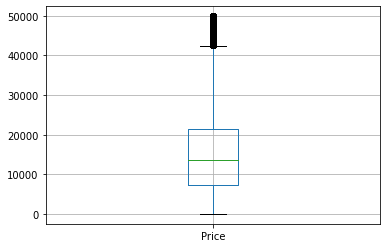

In [902]:
#remove cars prices over 100,000 from Price feature
df = df[df.Price < 50000]

df.boxplot(column = 'Price');
plt.title('');
plt.suptitle('');

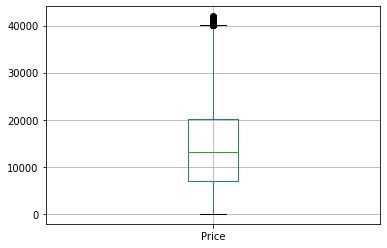

In [903]:
#remove cars prices over 100,000 from Price feature
df = df[df.Price < 42000]

df.boxplot(column = 'Price');
plt.title('');
plt.suptitle('');

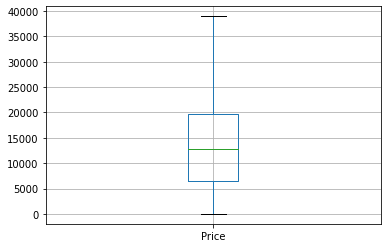

In [904]:
#remove cars prices over 100,000 from Price feature
df = df[df.Price < 39000]

df.boxplot(column = 'Price');
plt.title('');
plt.suptitle('');